In [1]:
import pandas as pd
import numpy as np   #importing the librariies needed 


In [2]:
titanic_data = pd.read_csv(r"C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\IEEE_WIE work\titanic ML WORK\data\titanic_train.csv")
titanic_data.head()     #reading the test dataset

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [102]:
titanic_data.info()   #checking for all sorts of null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


<AxesSubplot:xlabel='pclass', ylabel='age'>

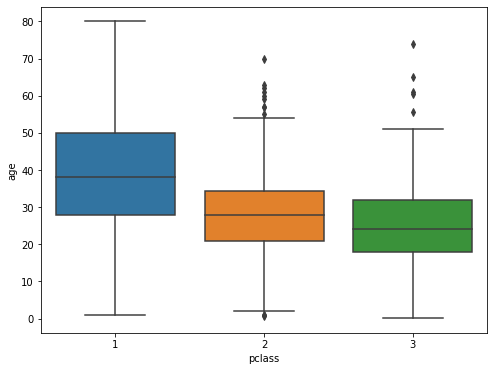

In [3]:
import seaborn as sns     # before dropping major null values, i checked for relationship between pclass and age
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))     # using the boxplot to observe the mean values of age in different clsses 
sns.boxplot(x='pclass',y='age',data=titanic_data)   

In [105]:
def fill_age(col):          # filling up the null value of age with the mean ages obtained from above plot 
    a=col[0]
    p=col[1]
    if pd.isnull(a):
        if p==1:
            return 37
        elif p==2:
            return 29
        else:
            return 24
    else: return a
titanic_data['age']=titanic_data[['age','pclass']].apply(fill_age,axis=1)


In [106]:
titanic_data.info() # checking for other unnecessary major null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [107]:
titanic_data.drop(titanic_data.columns[[0, 1, 2, 5, 6, 7, 9, 10, 11, 12, 13]], axis = 1, inplace = True)

In [108]:
titanic_data.head()

,sex,age,fare,survived
0,female,24.0,7.7333,1
1,male,38.0,8.6625,0
2,female,30.0,24.1500,0
3,female,54.0,23.0000,1
4,male,40.0,13.0000,0


In [109]:
titanic_data.info()   # checking if any null values are remaining 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       850 non-null    object 
 1   age       850 non-null    float64
 2   fare      849 non-null    float64
 3   survived  850 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 26.7+ KB


In [110]:
mean=titanic_data['fare'].mean()
titanic_data=titanic_data.fillna(mean)

In [111]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       850 non-null    object 
 1   age       850 non-null    float64
 2   fare      850 non-null    float64
 3   survived  850 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 26.7+ KB


In [112]:
titanic_data['sex'].value_counts() #observing male female ratio

male      551
female    299
Name: sex, dtype: int64

In [113]:
titanic_data.describe()

,age,fare,survived
count,850.000000,850.000000,850.000000
mean,28.785196,34.012701,0.368235
std,13.213890,53.674141,0.482610
min,0.166700,0.000000,0.000000
25%,22.000000,7.895800,0.000000
50%,25.000000,14.108300,0.000000
75%,36.000000,31.000000,1.000000
max,80.000000,512.329200,1.000000


In [114]:
titanic_data['sex']=titanic_data['sex'].replace(['female','male'],[0,1])  #simplifying the dataset 
titanic_data.head()

,sex,age,fare,survived
0,0,24.0,7.7333,1
1,1,38.0,8.6625,0
2,0,30.0,24.1500,0
3,0,54.0,23.0000,1
4,1,40.0,13.0000,0


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'fare'}>,
        <AxesSubplot:title={'center':'survived'}>]], dtype=object)

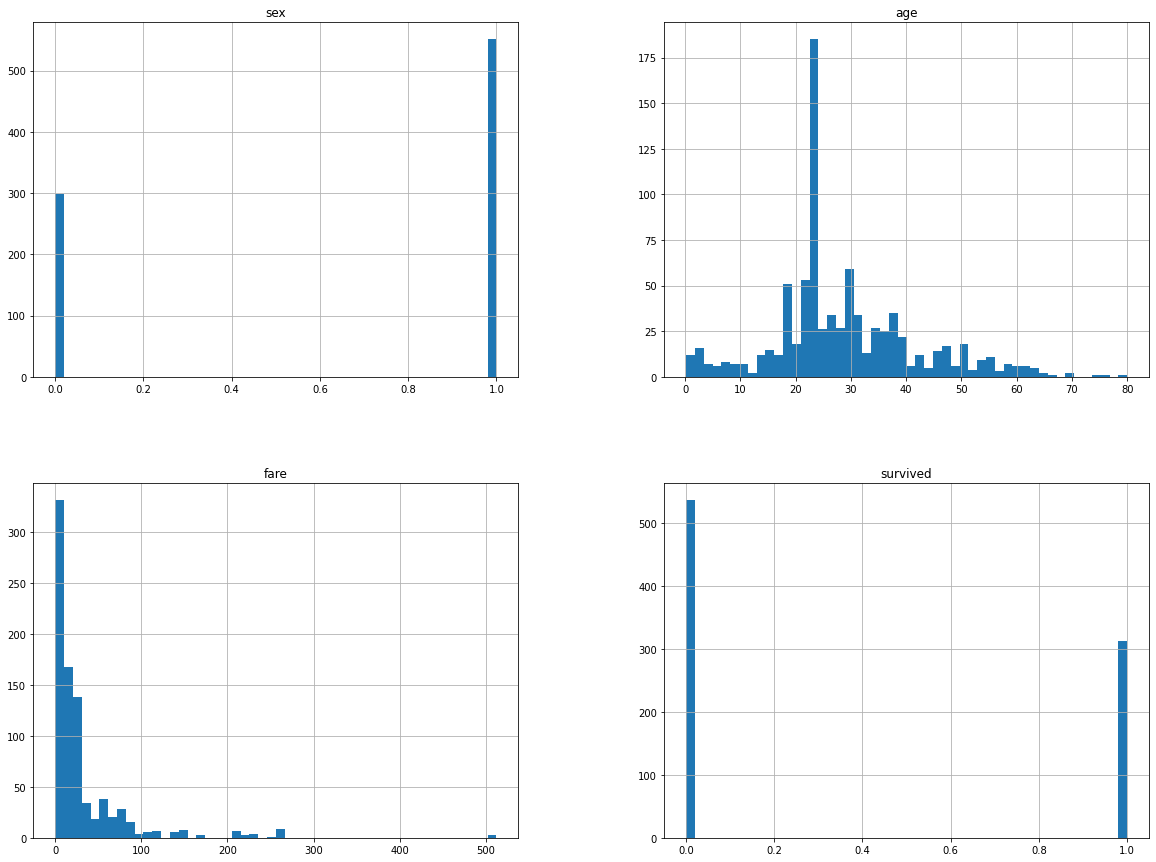

In [115]:
titanic_data.hist(bins = 50, figsize = (20, 15))   # observing various plots 

In [121]:
X=titanic_data.drop('survived',axis=1)
y=titanic_data['survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=101)   # training the data 



In [122]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)              # applying logistic regression 


In [123]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)             # checking accuracy of trained model 
accuracy

0.7705882352941177

In [4]:
test_data=pd.read_csv(r'C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\IEEE_WIE work\titanic ML WORK\data\titanic_test.csv')
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  459 non-null    int64  
 1   pclass        459 non-null    int64  
 2   name          459 non-null    object 
 3   sex           459 non-null    object 
 4   age           370 non-null    float64
 5   sibsp         459 non-null    int64  
 6   parch         459 non-null    int64  
 7   ticket        459 non-null    object 
 8   fare          459 non-null    float64
 9   cabin         104 non-null    object 
 10  embarked      458 non-null    object 
 11  boat          178 non-null    object 
 12  body          48 non-null     float64
 13  home.dest     281 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 50.3+ KB


<AxesSubplot:xlabel='pclass', ylabel='age'>

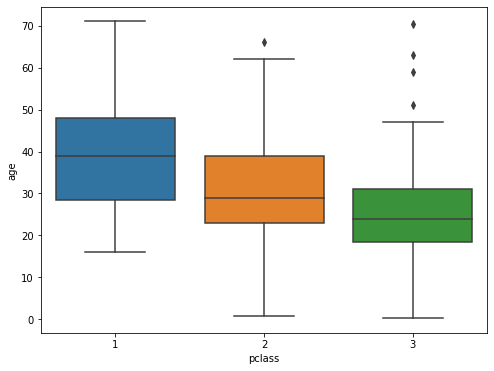

In [5]:
plt.figure(figsize=(8,6))
sns.boxplot(x='pclass',y='age',data=test_data) #test dataset provided in kaggle had major values missing (even age)

In [140]:
def fill_age(col):         # 89 values for age is missing in test dataset provided by kagle -_-
    a=col[0]
    p=col[1]
    if pd.isnull(a):
        if p==1:
            return 37
        elif p==2:
            return 29
        else:
            return 24
    else: return a
test_data['age']=test_data[['age','pclass']].apply(fill_age,axis=1)
test_data.drop(test_data.columns[[0, 1, 2, 5, 6, 7, 9, 10, 11, 12, 13]], axis = 1, inplace = True)
test_data['sex']=test_data['sex'].replace(['female','male'],[0,1])   # changing the sex into 0,1 values 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     459 non-null    int64  
 1   age     459 non-null    float64
 2   fare    459 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.9 KB


In [141]:
final_pred=model.predict(test_data)  # making predictions on test data 

In [144]:
predictions=pd.read_csv(r'C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\IEEE_WIE work\titanic ML WORK\data\gender_baseline.csv')
final_test=predictions['survived']   # reading original result to check accuracy of model 

In [145]:
accuracy1=accuracy_score(final_test,final_pred) #Overfitting is happening as crucial test data values are missing and I had to manipulate it a little 
accuracy1    # checking accuracy...  

0.9912854030501089